## Nishauri Bot

#### 1.0 import necessary libraries

In [8]:
import nltk
from nltk.stem import WordNetLemmatizer
import json
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import pickle
import random
import matplotlib.pyplot as plt


#### 1.1  Download NLTK data

In [9]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/itskios-09/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/itskios-09/nltk_data...


True

#### 1.2 Initialize lemmatizer

In [11]:
lemmatizer = WordNetLemmatizer()

#### 1.3 Load intents file

In [28]:
with open('./dataset/intents.json', "r", encoding="UTF-8") as file:
    intents = json.load(file)

#### 1.4 Initialize lists

In [29]:
words = []
classes = []
documents = []
ignore_words = ['?', '!']

#### 1.5 Process intents

In [30]:
for intent in intents['intents']:
    for pattern in intent['patterns']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['tag']))
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

#### 1.6 Lemmatize and lower each word, remove duplicates

In [31]:
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))

In [32]:
print(f"{len(documents)} documents")
print(f"{len(classes)} classes: {classes}")
print(f"{len(words)} unique lemmatized words: {words}")

337 documents
24 classes: ['artregimen', 'baby', 'book_appointment', 'created', 'eidgen', 'feelingbad', 'goodbye', 'greeting', 'hiv_and_kids', 'hiv_status', 'hiv_symptoms', 'hiv_testing', 'hivtreatment', 'medication', 'name', 'options', 'results', 'stable', 'thanks', 'treatment', 'vlgen', 'vlresults', 'what_is_pep', 'what_is_prep']
505 unique lemmatized words: ["'m", "'s", "'ve", '(', ')', '+ve', ',', '.', '18', 'a', 'ability', 'about', 'abuse', 'access', 'accurate', 'achieved', 'acronym', 'activity', 'added', 'address', 'adherence', 'adhering', 'adjusted', 'adopt', 'adult', 'advance', 'advanced', 'affect', 'after', 'after-hours', 'against', 'age', 'alcohol', 'all', 'allergic', 'allow', 'already', 'am', 'an', 'and', 'anonymous', 'antiretroviral', 'any', 'anyone', 'anything', 'appear', 'appointment', 'are', 'art', 'ask', 'ass', 'assisted', 'associated', 'at', 'attendance', 'attention', 'availability', 'available', 'avoid', 'aware', 'away', 'awesome', 'baby', 'bad', 'basic', 'be', 'becom

#### 1.7 Saving words and classes

In [33]:
pickle.dump(words, open('./dumps/texts.pkl', 'wb'))
pickle.dump(classes, open('./dumps/labels.pkl', 'wb'))

#### 1.8 Create training data

In [35]:
training = []
output_empty = [0] * len(classes)

for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])   

#### 1.9 Shuffle and convert to numpy array

In [36]:
random.shuffle(training)

train_x = []
train_y = []

for features, label in training:
    train_x.append(features)
    train_y.append(label)

train_x = np.array(train_x)
train_y = np.array(train_y)

#### 2.0 Build neural network model

In [40]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

#### 2.1 Compile model

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 2.2 Fit the model

In [46]:
hist = model.fit(np.array(train_x), np.array(train_y), epochs=150, batch_size=5, verbose=1)

Epoch 1/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9925 - loss: 0.0306   
Epoch 2/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9892 - loss: 0.0242
Epoch 3/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9753 - loss: 0.0511   
Epoch 4/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9727 - loss: 0.0443 
Epoch 5/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.0464   
Epoch 6/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9908 - loss: 0.0334
Epoch 7/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9928 - loss: 0.0256
Epoch 8/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9850 - loss: 0.0426 
Epoch 9/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9795 - loss: 0.0361   
Epoch 10/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.0282   
Epoch 11/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9986 - loss: 0.0177   
Epoch 12/150
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 

#### 2.3 plot the accuracy

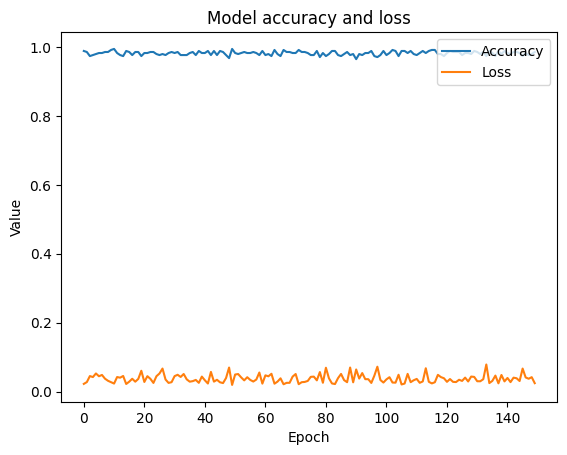

In [50]:
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.title('Model accuracy and loss')
    plt.ylabel('Value')
    plt.xlabel('Epoch')
    plt.legend(['Accuracy', 'Loss'], loc='upper right')
    plt.show()

plot_history(hist)

In [ ]:
    model.save('../m/nishauribot.h5', save_format='h5')
    model.save('../model/nishauribot.keras')

    print("New model created and saved.")